# Frankenstein Scraper

### Tasks:
* Store all distinct words in the text in a dictionary and keep track of the word counts (make sure to strip all punctuation and lower the case of the words)
* There are 4 sentences in this text, composed of words that are “hidden” (bookended by special characters). Find the sentences in the text.
* Save the distinct word dictionary as a JSON file ('word_count_dict.json')
* Save the 4 hidden sentences together as a list of lists, then join them and print them with a for loop
* Remove the 4 hidden sentences from the original text file and save a clean version of the first chapter of Frankenstein to a text file ('Clean_Frankenstein.txt')
* Plot a histogram of the count of words by word length for all words in the document


### Import Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import docx2txt
import json
import re
from itertools import groupby

import sys
import warnings

### Load & Clean Data

In [8]:
# Set directory
data_loc = 'C://Users/User/Documents/GitHub/Python/Frankenstein Scraper/'

In [9]:
# Import data
text = docx2txt.process(data_loc + 'Problem_Statement.docx')

In [10]:
print(text)

Problem Statement

Build a scraper that manipulates the associated text document (the first chapter of the book Frankenstein) to do the following:

Store all distinct words in the text in a dictionary and keep track of the word counts (make sure to strip all punctuation and lower the case of the words)

There are 4 sentences in this text, composed of words that are “hidden” (bookended by special characters). Find the sentences in the text.

Save the distinct word dictionary as a JSON file (call it 'word_count_dict.json')

Save the 4 hidden sentences together as a list of lists, then join them and print them with a for loop

Remove the 4 hidden sentences from the original text file and save a clean version of the first chapter of Frankenstein to a text file (call it 'Clean_Frankenstein.txt')

Plot a histogram of the count of words by word length for all words in the document.



Text Data for Coding Challenge: frankenstein_chpt_1

“Letter 1

To Mrs. Saville, England. <Scrapers<

St. Pet

In [11]:
type(text)

str

In [12]:
len(text)

7891

In [13]:
# Split the text to keep only chapter 1
chap1 = text.split("frankenstein_chpt_1")[1] 
chap1

"\n\n“Letter 1\n\nTo Mrs. Saville, England. <Scrapers<\n\nSt. Petersburgh, Dec. 11th, 17—.\n\nYou will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my $You$ dear sister of my welfare and increasing confidence in the success of my undertaking.\n\nI am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents $are$ itself to my imagination as the region of beauty and delight. There, Margaret, the sun is

### Task 1: Build a Dictionary

In [14]:
# Using a for loop to build a dictionary for each word with counts
dictionary = dict()
for i in chap1.split():
    i = i.lower()
    i = re.sub(r'[\W_]+', '', i)
    if i in dictionary.keys():
        dictionary[i] = dictionary[i]+1
    else:
        dictionary[i] = 1
        
# Output result
dictionary

{'letter': 2,
 '1': 1,
 'to': 35,
 'mrs': 1,
 'saville': 1,
 'england': 1,
 'scrapers': 1,
 'st': 2,
 'petersburgh': 3,
 'dec': 1,
 '11th': 1,
 '17': 1,
 'you': 11,
 'will': 5,
 'rejoice': 1,
 'hear': 1,
 'that': 12,
 'no': 3,
 'disaster': 1,
 'has': 3,
 'accompanied': 2,
 'the': 68,
 'commencement': 1,
 'of': 36,
 'an': 6,
 'enterprise': 2,
 'which': 19,
 'have': 8,
 'regarded': 1,
 'with': 12,
 'such': 2,
 'evil': 1,
 'forebodings': 1,
 'i': 46,
 'arrived': 1,
 'here': 1,
 'yesterday': 1,
 'and': 44,
 'my': 42,
 'first': 2,
 'task': 1,
 'is': 9,
 'assure': 1,
 'dear': 4,
 'sister': 3,
 'welfare': 1,
 'increasing': 1,
 'confidence': 1,
 'in': 24,
 'success': 1,
 'undertaking': 3,
 'am': 4,
 'already': 2,
 'far': 2,
 'north': 3,
 'london': 1,
 'as': 9,
 'walk': 1,
 'streets': 1,
 'feel': 2,
 'a': 26,
 'cold': 3,
 'northern': 1,
 'breeze': 2,
 'play': 1,
 'upon': 1,
 'cheeks': 1,
 'braces': 1,
 'nerves': 1,
 'fills': 1,
 'me': 9,
 'delight': 2,
 'do': 3,
 'understand': 1,
 'this': 9,
 '

### Task 2: Save the Dictionary 

In [15]:
# Function to write file to JSON
def WriteJSON(path, file, data):
    filepath = path + file + '.json'
    with open(filepath, 'w') as location:
        json.dump(data, location)

# Write dictionary to JSON
WriteJSON(data_loc,'word_count_dict',dictionary)

### Task 3: Identify Hidden Text

In [16]:
# Creating list object that searches for characters and compiles list
hidden_list = []
for i in chap1.split():
    regex = re.compile('[@_#$%^&*()<>/\|}{~]')   
    if(regex.search(i) == None):
        continue
    else:
        hidden_list.append(i)

# Output List
hidden_list

['<Scrapers<',
 '$You$',
 '$are$',
 "*You're*",
 '#Found#',
 '*killin*',
 '#another#',
 '<for<',
 '$amazing!$',
 '<the<',
 '*it!*',
 '#one!#',
 'Walton<win!<”']

In [17]:
# Cleaning up the one of the list elements
hidden_list[12] = hidden_list[12].replace("Walton", "")
hidden_list[12] = hidden_list[12][:-1]

In [18]:
# Verfying clean up
hidden_list

['<Scrapers<',
 '$You$',
 '$are$',
 "*You're*",
 '#Found#',
 '*killin*',
 '#another#',
 '<for<',
 '$amazing!$',
 '<the<',
 '*it!*',
 '#one!#',
 '<win!<']

### Task 4: Save and Print Hidden Sentences

In [19]:
# Grouping by special characters to reveal sentences
key = lambda x: x[0]
arranged = sorted(hidden_list, key = key)
result = [list(ele) for i, ele in groupby(arranged, key)]

# Output
result

[['#Found#', '#another#', '#one!#'],
 ['$You$', '$are$', '$amazing!$'],
 ["*You're*", '*killin*', '*it!*'],
 ['<Scrapers<', '<for<', '<the<', '<win!<']]

In [20]:
# Clean lists and print as sentences in for loop
clean_list = []
for i in range(len(result)):
    message = ' '.join(result[i])
    message = re.sub('[#$*<]', "", message)
    clean_list.append(message)
    print(message)

Found another one!
You are amazing!
You're killin it!
Scrapers for the win!


### Task 5: Remove Hidden Text from Chapter 1

In [21]:
# Re-use the hidden_list from earlier
hidden_list

['<Scrapers<',
 '$You$',
 '$are$',
 "*You're*",
 '#Found#',
 '*killin*',
 '#another#',
 '<for<',
 '$amazing!$',
 '<the<',
 '*it!*',
 '#one!#',
 '<win!<']

In [22]:
# Function to clean text 
def CleanText(data,references):
    clean_data = data
    for i in range(len(references)):
        clean_data = clean_data.replace(references[i], "")
    return(clean_data)

# Apply function
chap1_clean = CleanText(chap1,hidden_list)

# Print output
print(chap1_clean)



“Letter 1

To Mrs. Saville, England. 

St. Petersburgh, Dec. 11th, 17—.

You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my  dear sister of my welfare and increasing confidence in the success of my undertaking.

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents  itself to my imagination as the region of beauty and delight. There, Margaret, the sun is for ever visible, its broad di

In [23]:
# Save new text to a clean .txt document
file = open(data_loc + "Clean_Frankenstein.txt", "w")
file.write(chap1_clean)
file.close()

### Task 6: Plot Histogram of Word Counts

In [24]:
# Using the cleaned version of the text, the for loop 
# removes punctuation and then returns count of lengths in a list
count = dict()
for i in chap1_clean.split():
    i =  re.sub(r'[^\w\s]', '', i)
    l = len(i)
    if l in count .keys():
        count[l] = count[l]+1
    else:
        count[l] = 1
        
# Output
count

{6: 94,
 1: 74,
 2: 230,
 3: 218,
 7: 86,
 11: 28,
 4: 179,
 8: 59,
 12: 10,
 10: 28,
 5: 133,
 9: 58,
 15: 1,
 14: 2}

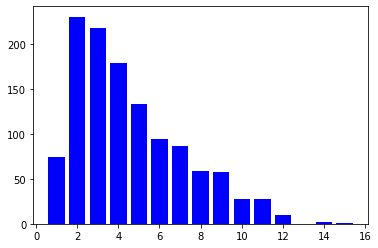

In [25]:
# Plot a histogram of the counts
plt.bar(list(count.keys()), count.values(), color='b')
plt.show()